
--- AI-Powered Natural Disaster Predictions ---

🔹 FLOOD
Input Data: ['250.55', '2.92', '0.68']
Prediction: ✅ SAFE

🔹 EARTHQUAKE
Input Data: ['4.61', '1.42', '9.43']
Prediction: ✅ SAFE

🔹 TSUNAMI
Input Data: ['7.53', '2779.26', '249.55']
Prediction: ✅ SAFE

🔹 LANDSLIDE
Input Data: ['275.51', '43.10', '0.48']
Prediction: ⚠ RISK

🔹 STORM
Input Data: ['108.56', '18.24', '0.91']
Prediction: ✅ SAFE

🔹 VOLCANO
Input Data: ['0.62', '120.78', '23.71']
Prediction: ⚠ RISK


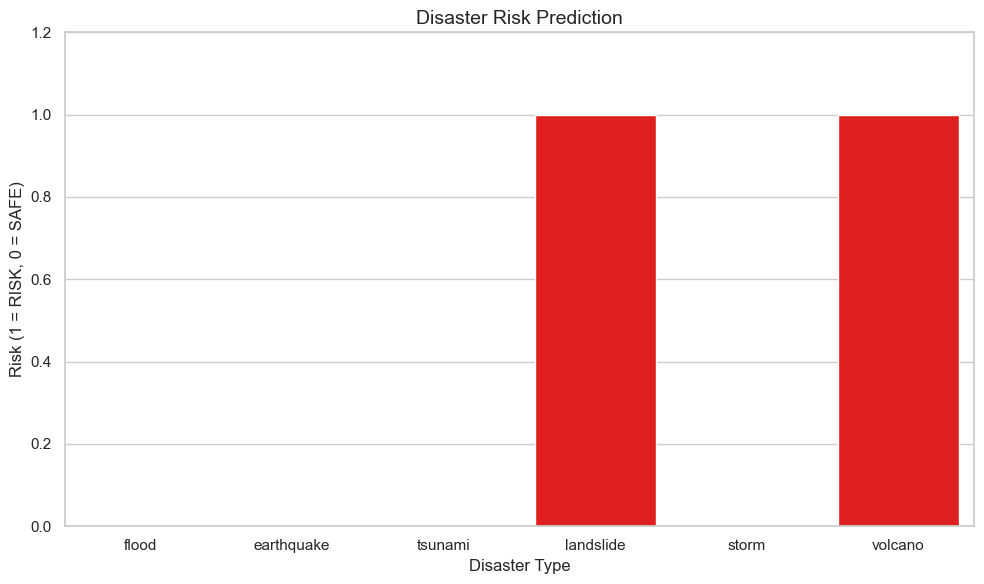

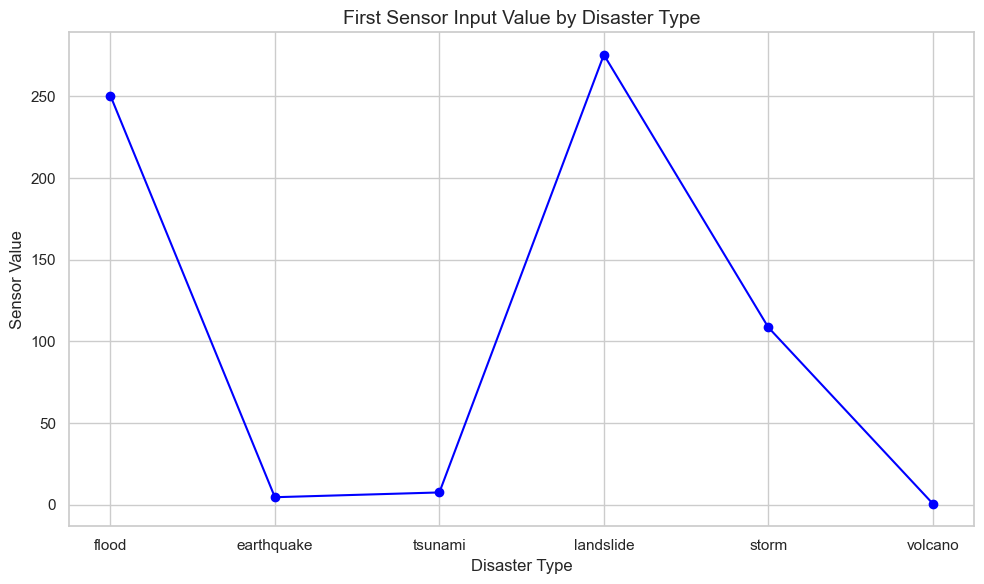

In [2]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set style for clean plots
sns.set(style="whitegrid")

# Train models for each disaster
def train_models():
    models = {}

    models['flood'] = RandomForestClassifier().fit(
        pd.DataFrame([[80, 2.1, 0.4], [250, 6.5, 1.0], [300, 7.0, 0.95], [90, 3.0, 0.5]],
                     columns=['rainfall_mm', 'river_level', 'soil_saturation']),
        [0, 1, 1, 0])

    models['earthquake'] = DecisionTreeClassifier().fit(
        pd.DataFrame([[2.5, 0.1, 10], [6.7, 1.2, 30], [7.8, 1.5, 20], [3.2, 0.3, 15]],
                     columns=['seismic_activity', 'ground_displacement', 'depth_km']),
        [0, 1, 1, 0])

    models['tsunami'] = LogisticRegression().fit(
        pd.DataFrame([[5.0, 1000, 200], [7.5, 5000, 50], [8.9, 8000, 30], [6.0, 2000, 150]],
                     columns=['quake_magnitude', 'ocean_depth', 'epicenter_distance']),
        [0, 1, 1, 0])

    models['landslide'] = GaussianNB().fit(
        pd.DataFrame([[100, 25, 0.4], [300, 45, 0.9], [400, 50, 1.0], [120, 30, 0.5]],
                     columns=['rainfall_mm', 'slope_angle', 'soil_moisture']),
        [0, 1, 1, 0])

    models['storm'] = SVC(probability=True).fit(
        pd.DataFrame([[50, 5, 0.6], [150, 20, 0.95], [180, 25, 0.98], [70, 10, 0.7]],
                     columns=['wind_speed', 'pressure_drop', 'humidity']),
        [0, 1, 1, 0])

    models['volcano'] = GradientBoostingClassifier().fit(
        pd.DataFrame([[0.1, 40, 20], [0.9, 120, 85], [1.0, 150, 100], [0.3, 50, 30]],
                     columns=['magma_movement', 'ground_temp', 'gas_emission']),
        [0, 1, 1, 0])

    return models

# Generate simulated input values
def simulate_inputs():
    return {
        'flood': [random.uniform(70, 300), random.uniform(2, 7), random.uniform(0.4, 1)],
        'earthquake': [random.uniform(2, 8), random.uniform(0.1, 2), random.uniform(5, 40)],
        'tsunami': [random.uniform(5, 9), random.uniform(1000, 8000), random.uniform(30, 250)],
        'landslide': [random.uniform(80, 400), random.uniform(20, 50), random.uniform(0.3, 1)],
        'storm': [random.uniform(40, 180), random.uniform(5, 30), random.uniform(0.6, 1)],
        'volcano': [random.uniform(0.1, 1.0), random.uniform(30, 160), random.uniform(10, 100)],
    }

# Make predictions
def predict_all(models, inputs):
    feature_names = {
        'flood': ['rainfall_mm', 'river_level', 'soil_saturation'],
        'earthquake': ['seismic_activity', 'ground_displacement', 'depth_km'],
        'tsunami': ['quake_magnitude', 'ocean_depth', 'epicenter_distance'],
        'landslide': ['rainfall_mm', 'slope_angle', 'soil_moisture'],
        'storm': ['wind_speed', 'pressure_drop', 'humidity'],
        'volcano': ['magma_movement', 'ground_temp', 'gas_emission'],
    }

    results = {}
    for disaster, features in inputs.items():
        df_input = pd.DataFrame([features], columns=feature_names[disaster])
        prediction = models[disaster].predict(df_input)[0]
        results[disaster] = {
            'inputs': features,
            'status': "⚠ RISK" if prediction == 1 else "✅ SAFE"
        }
    return results

# Plot charts
def plot_results(results):
    disasters = list(results.keys())
    risk_status = [1 if results[d]['status'] == "⚠ RISK" else 0 for d in disasters]
    first_inputs = [results[d]['inputs'][0] for d in disasters]
    bar_colors = ['red' if r == 1 else 'green' for r in risk_status]

    # Bar Chart: Risk Prediction
    plt.figure(figsize=(10, 6))
    sns.barplot(x=disasters, y=risk_status, palette=bar_colors)
    plt.title("Disaster Risk Prediction", fontsize=14)
    plt.ylabel("Risk (1 = RISK, 0 = SAFE)")
    plt.xlabel("Disaster Type")
    plt.ylim(0, 1.2)
    plt.tight_layout()
    plt.show()

    # Line Chart: First Input Feature
    plt.figure(figsize=(10, 6))
    plt.plot(disasters, first_inputs, marker='o', linestyle='-', color='blue')
    plt.title("First Sensor Input Value by Disaster Type", fontsize=14)
    plt.ylabel("Sensor Value")
    plt.xlabel("Disaster Type")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Main
models = train_models()
inputs = simulate_inputs()
results = predict_all(models, inputs)

print("\n--- AI-Powered Natural Disaster Predictions ---")
for disaster, result in results.items():
    print(f"\n🔹 {disaster.upper()}")
    print(f"Input Data: {[f'{v:.2f}' for v in result['inputs']]}")
    print(f"Prediction: {result['status']}")

plot_results(results)